# Visualize CBH Schemes

In [1]:
# import relevant rdkit 
from rdkit import Chem
from rdkit.Chem import Draw, rdChemReactions
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from IPython.display import SVG, display

# Import CBH generator
from CBH import buildCBH
import thermochemical_network

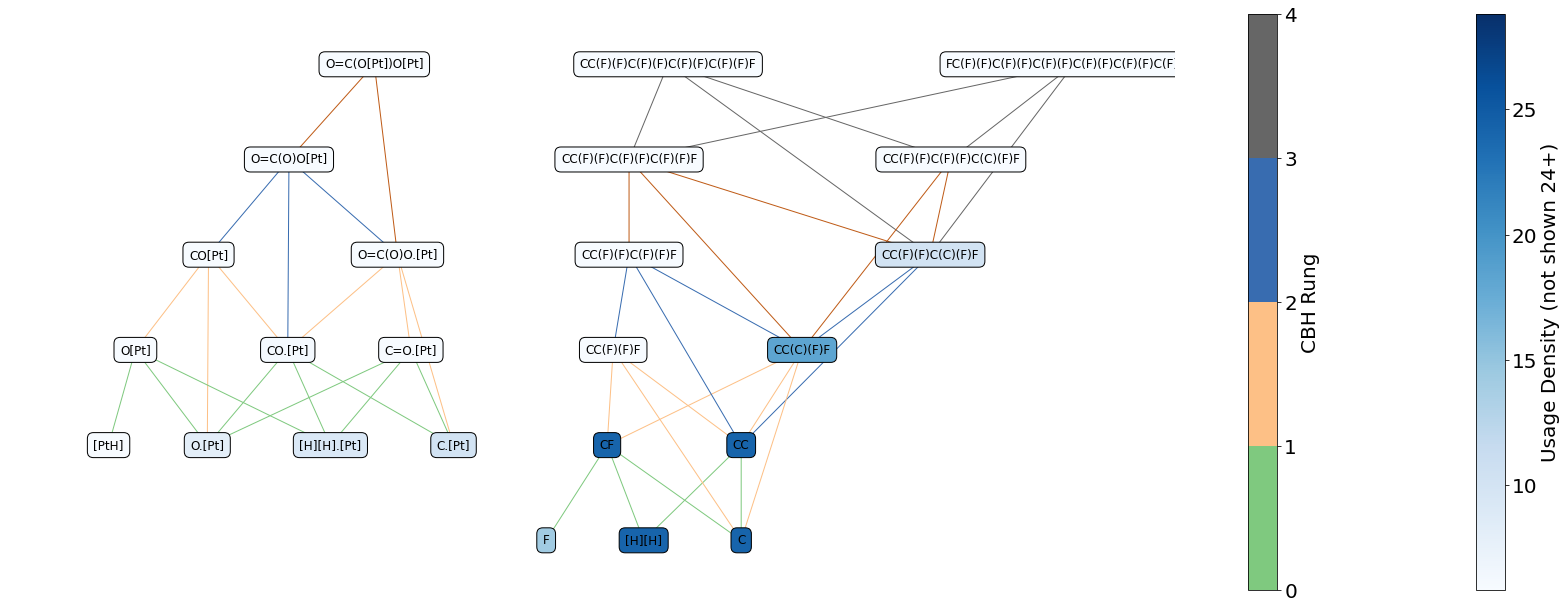

In [2]:
tn = thermochemical_network.TN(['O=C(O[Pt])O[Pt]', 
                                'CC(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 
                                'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F'], 4, surface_smiles='[Pt]')
g = tn.build()
tn.visualize()

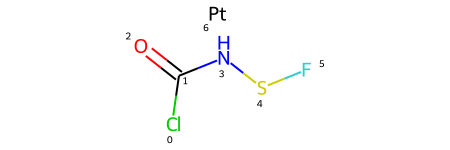

In [3]:
# Input to the CBH generator is a SMILES string.
# Visualize the molecule you will use. 
# Use the following link for getting help with this:
#     http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html

########### CHANGE THIS ############
mol = 'ClC(=O)NSF.[Pt]'
####################################
m = Chem.MolFromSmiles(mol)
m


-----------------------------------------------------------------------------------------------------

CBH RUNG 3

Reactants:


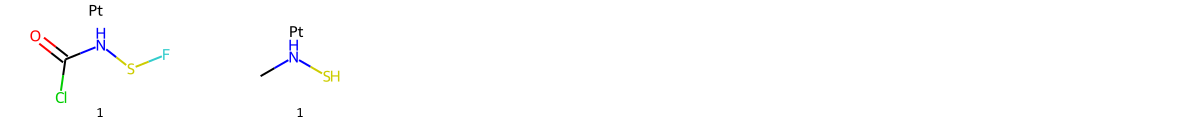


Products:


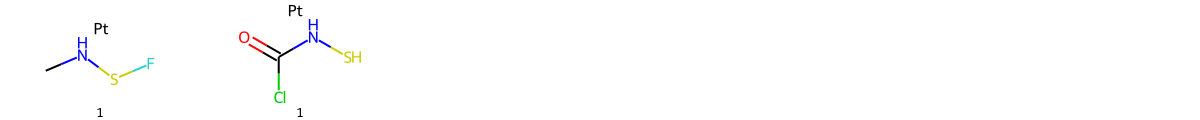

In [4]:
# Instantiate and build the CBH scheme
# This will automatically build a CBH scheme until the rung before 
# Use different saturation atoms by putting the element name in SMILES format or the atomic number
# i.e., buildCBH(mol, 9) or buildCBH(mol, 'F') will return fluorinated CBH schemes
cbh = buildCBH(mol,1, allow_overshoot=True, ignore_F2=False, surface_smiles='[Pt]')

## Visualize the reactions for each cbh_rung.
# You can specify the CBH rung or leave it empty for all
# noargs --> all
# 1 --> CBH-1
# -1 --> highest CBH rung
cbh.visualize(-1) 

In [5]:
print('Rcts')
for r in range(cbh.highest_cbh+1):
    print(f'\tRung {r}: {cbh.cbh_rcts[r]}')
print('Pdts')
for r in range(cbh.highest_cbh+1):
    print(f'\tRung {r}: {cbh.cbh_pdts[r]}')   

Rcts
	Rung 0: {'[H][H].[Pt]': 6.0}
	Rung 1: {'C.[Pt]': 2, 'S.[Pt]': 1, 'N.[Pt]': 1}
	Rung 2: {'CN.[Pt]': 1, 'NS.[Pt]': 1}
	Rung 3: {'CNS.[Pt]': 1}
Pdts
	Rung 0: {'F.[Pt]': 1, 'O.[Pt]': 1, 'Cl.[Pt]': 1, 'C.[Pt]': 1, 'S.[Pt]': 1, 'N.[Pt]': 1}
	Rung 1: {'C=O.[Pt]': 1, 'FS.[Pt]': 1, 'CN.[Pt]': 1, 'CCl.[Pt]': 1, 'NS.[Pt]': 1}
	Rung 2: {'CNS.[Pt]': 1, 'NC(=O)Cl.[Pt]': 1, 'NSF.[Pt]': 1}
	Rung 3: {'CNSF.[Pt]': 1, 'O=C(Cl)NS.[Pt]': 1}
